---
## summaries - Bert Score

----


    
  BERT SCORE -------------------------------------------------------

5 - Processing avec BERT SCORE 

In [2]:
import pandas as pd
import numpy as np



In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import colorcet as cc

palette = sns.color_palette(cc.glasbey_warm, n_colors=100)

In [8]:

df = pd.read_csv(r'D:\Documents\DATA_SCIENCE\DATASCIENTEST_juin_2024\PROJET\Huggingface\jun24_bc_llm\notebooks\DATA_WorkInProgr\df_all_summaries_rouge-llm_eval_elagage.csv',index_col=0)
#len(df)

# 1. Préparation / adaptation du df

In [9]:
# Création d'un id de référence pour chaque ligne
df.loc[:,'summary_ref_id'] = df.loc[:,'cluster_id'] + "_" + df.loc[:,"prompt_type"]

In [12]:
df=df.drop(['level_0','index','Unnamed: 0'], axis = 1)

## 2. BERT SCORE

In [25]:
#!pip install bert-score

In [13]:
from transformers import BertTokenizer, BertModel
from bert_score import BERTScorer

scorer = BERTScorer(model_type='bert-base-uncased')

In [14]:
def BertScore(summary, reference) : 
    _, _, F1 = scorer.score([summary], [reference])
    return F1.item()

In [32]:
df['Bert_Score'] = df.apply(lambda x : BertScore(x['summary'], x['ref_summary']),axis =1)

# !! durée env. 32 minutes

In [15]:

df['Bert_Score'].head(5)

0    0.671173
1    0.702108
2    0.641734
3    0.667710
4    0.690918
Name: Bert_Score, dtype: float64

---------
### Bert Score : Quelques premières visualisations
-----------

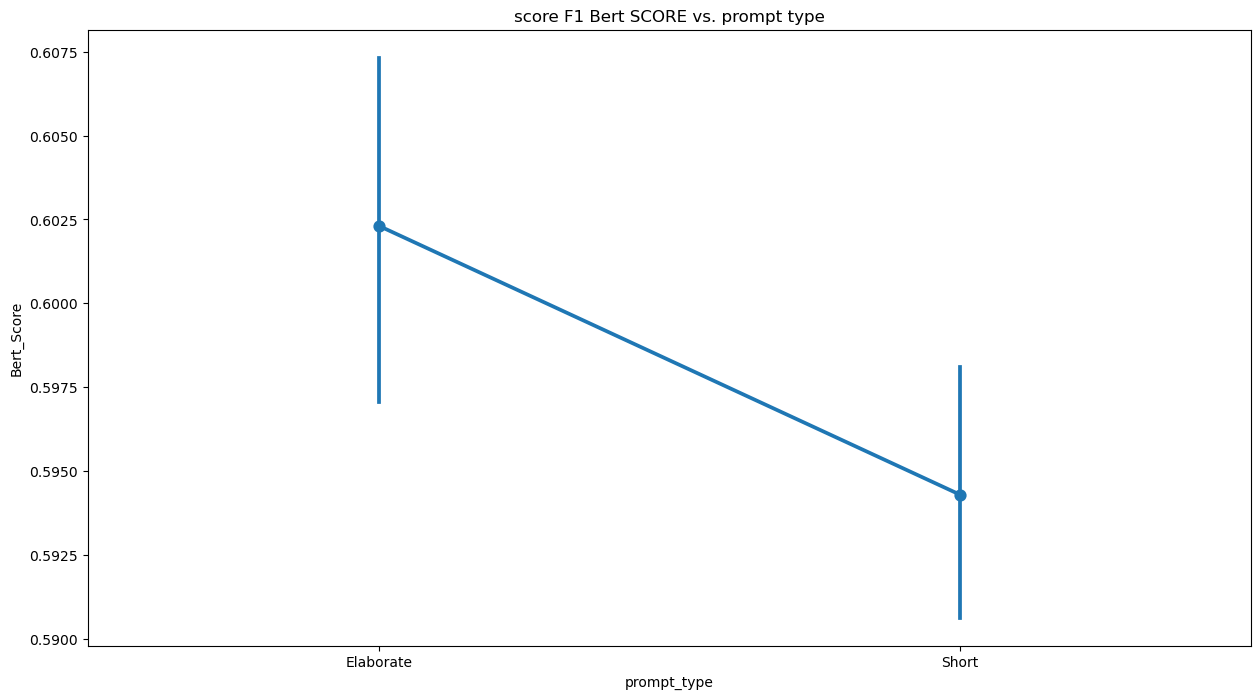

In [36]:

fig, ax = plt.subplots(figsize=[15,8])
sns.pointplot(y="Bert_Score", x="prompt_type", data=df_merged, ax=ax)
plt.title("score F1 Bert SCORE vs. prompt type")
plt.show()


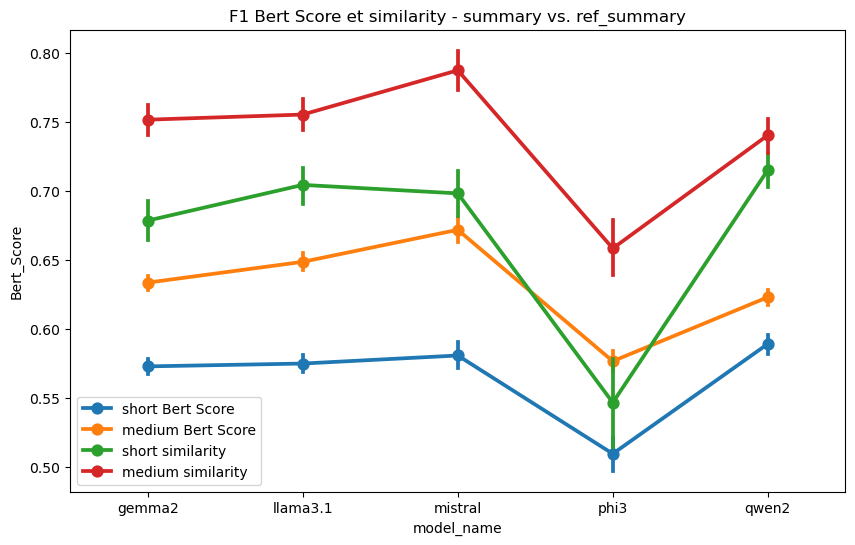

In [41]:
fig, ax = plt.subplots(figsize=[10,6])
sns.pointplot(data = df_merged[df_merged['type']=='R_short'], x = 'model_name', y = 'Bert_Score', label ='short Bert Score')
sns.pointplot(data = df_merged[df_merged['type']=='R_medium'], x = 'model_name', y = 'Bert_Score', label = 'medium Bert Score')
sns.pointplot(data = df_merged[df_merged['type']=='R_short'], x = 'model_name', y = 'cosine_similarity', label ='short similarity')
sns.pointplot(data = df_merged[df_merged['type']=='R_medium'], x = 'model_name', y = 'cosine_similarity', label = 'medium similarity')
#sns.violinplot(y="cosine_similarity", x="model_name", data=df, ax=ax)
plt.title("F1 Bert Score et similarity - summary vs. ref_summary")
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


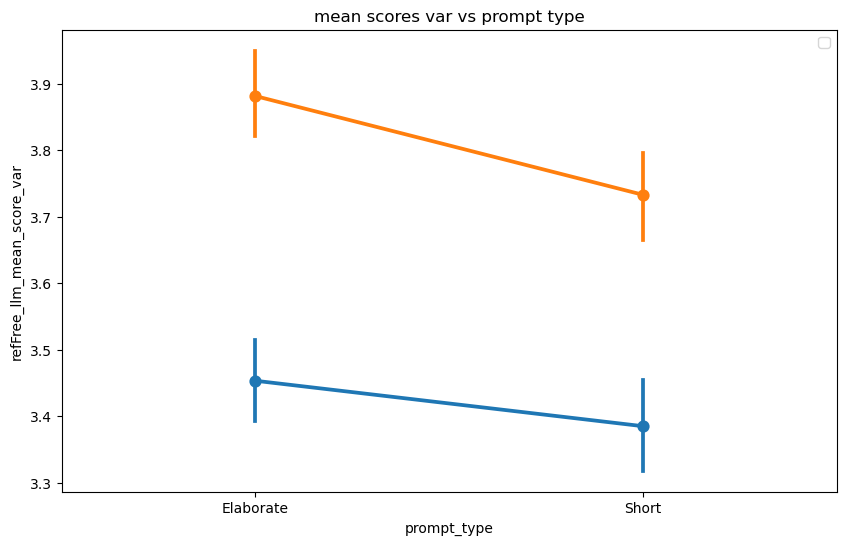

In [39]:
fig, ax = plt.subplots(figsize=[10,6])
sns.pointplot(data = df_merged, x = 'prompt_type', y = 'refFree_llm_mean_score_var')
sns.pointplot(data = df_merged, x = 'prompt_type', y = 'Accuracy_llm_var')

plt.title("mean scores var vs prompt type")
plt.legend()
plt.show()